<a href="https://colab.research.google.com/github/hansikagollen/mini-project/blob/main/mini_project_fresh_water_fish_disease_paper_implmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4


  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.4 which is incompatible.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.13.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
tensorstore 0.1.73 requires ml_dtypes>=0.3.1, but you

In [ ]:
!pip install tensorflow==2.14.0


  Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.9 MB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
Using cached tensorboard-2.14.1-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.14.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorbo

In [ ]:

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets

from tensorflow.keras import layers
import tensorflow

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import pytest
import zipfile
import requests
import sklearn
import scipy
import seaborn as sns
import tensorflow.keras.callbacks
import tensorflow as tf
from matplotlib.pyplot import rcParams

AttributeError: module 'numpy' has no attribute 'dtypes'

In [ ]:
!pip install tensorflow==2.13.0

  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nibabel 5.3.2 requires typing-extensions>=4.6; python_version < "3.13", but you have typing-extensions 4.5.0 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.13.0 which is incompatible.
jax 0.5.2 requires ml_dtypes>=0.4.0, but you have ml-dtypes 0.2.0 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (11).zip to archive (11).zip


In [ ]:
import zipfile
import os

zip_path = "/content/archive (11).zip"  # Change this to the uploaded ZIP file name
extract_path = "/content/augmented_dataset/Fresh Water Fish Dataset"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete! Files are in:", extract_path)


✅ Extraction complete! Files are in: /content/augmented_dataset/Fresh Water Fish Dataset


In [ ]:
import os
dataset_path = "/content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset"

  # Change this if needed

# Traverse all subdirectories
for root, dirs, files in os.walk(dataset_path):
    image_count = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))])
    if image_count > 0:
        print(f"Folder: {root} → {image_count} images")


Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Healthy Fish → 31 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Tail And Fin Rot → 9 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/THE BACTERIAL GILL ROT → 6 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Broken antennae and rostrum → 7 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Argulus → 23 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Redspot → 31 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/EUS → 26 images


In [ ]:
total_images = sum([len(files) for _, _, files in os.walk(dataset_path) if any(f.endswith(('.png', '.jpg', '.jpeg')) for f in files)])
print(f"Total Images in Dataset: {total_images}")


Total Images in Dataset: 133


In [ ]:
import os
import cv2
import numpy as np
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset path
dataset_path = "/content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset"

augmented_path = "/content/augmented_dataset"

# Ensure augmented directory exists
os.makedirs(augmented_path, exist_ok=True)

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

# Process each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)
    save_path = os.path.join(augmented_path, class_folder)

    os.makedirs(save_path, exist_ok=True)  # Create augmented subfolder

    images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        image = cv2.resize(image, (128, 128))  # Resize to 128x128

        # Expand dims for augmentation
        image = np.expand_dims(image, axis=0)

        # Generate 5 augmented images per original image
        i = 0
        for batch in datagen.flow(image, batch_size=1, save_to_dir=save_path, save_prefix="aug", save_format="jpg"):
            i += 1
            if i >= 5:  # Create 5 variations
                break

print("✅ Data augmentation complete! Check '/content/augmented_dataset' for augmented images.")


✅ Data augmentation complete! Check '/content/augmented_dataset' for augmented images.


In [ ]:
!pip install numpy==1.26.4
!pip install tensorflow==2.14.0

In [ ]:
!pip uninstall -y numba numpy tf-keras jax tensorstore tensorflow-text
!pip install numpy==1.26.4 tensorflow==2.14.0 numba tf-keras jax tensorstore tensorflow-text

Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Successfully uninstalled numpy-2.2.4
Found existing installation: tf_keras 2.18.0
Uninstalling tf_keras-2.18.0:
  Successfully uninstalled tf_keras-2.18.0
Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Successfully uninstalled jax-0.5.2
Found existing installation: tensorstore 0.1.73
Uninstalling tensorstore-0.1.73:
  Successfully uninstalled tensorstore-0.1.73
Found existing installation: tensorflow-text 2.18.1
Uninstalling tensorflow-text-2.18.1:
  Successfully uninstalled tensorflow-text-2.18.1
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to 

In [ ]:
!pip install numpy>=1.20

In [ ]:
import os

dataset_path = "/content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset"
  # Ensure this path is correct

if os.path.exists(dataset_path):
    print("✅ Dataset directory exists.")
    print("Contents:", os.listdir(dataset_path))
else:
    print("❌ Dataset directory does NOT exist. Check the path.")


✅ Dataset directory exists.
Contents: ['Healthy Fish', 'Tail And Fin Rot', 'THE BACTERIAL GILL ROT', 'Broken antennae and rostrum', 'Argulus', 'Redspot', 'EUS']


In [ ]:
import os

# Define augmented dataset path
dataset_path = "/content/augmented_dataset"  # Change this if needed

# Count images in all class folders
total_images = 0
for root, _, files in os.walk(dataset_path):
    image_count = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))])
    if image_count > 0:
        print(f"Folder: {root} → {image_count} images")
    total_images += image_count

print(f"\n✅ Total Images in Augmented Dataset: {total_images}")


Folder: /content/augmented_dataset/Healthy Fish → 155 images
Folder: /content/augmented_dataset/Tail And Fin Rot → 45 images
Folder: /content/augmented_dataset/THE BACTERIAL GILL ROT → 30 images
Folder: /content/augmented_dataset/Broken antennae and rostrum → 35 images
Folder: /content/augmented_dataset/Argulus → 113 images
Folder: /content/augmented_dataset/Redspot → 154 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Healthy Fish → 31 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Tail And Fin Rot → 9 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/THE BACTERIAL GILL ROT → 6 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Broken antennae and rostrum → 7 images
Folder: /content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset/Argulus → 23 images
Folder: /content/augmented_dataset/Fresh Water 

In [ ]:
dataset_path = "/content/augmented_dataset"

# Exclude unwanted subfolders
ignore_folders = ["Fresh Water Fish Dataset"]  # Add any extra unwanted folders here

total_images = 0
for root, dirs, files in os.walk(dataset_path):
    # Skip ignored folders
    if any(ignored in root for ignored in ignore_folders):
        continue

    image_count = len([f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))])
    if image_count > 0:
        print(f"Folder: {root} → {image_count} images")
    total_images += image_count

print(f"\n✅ Total Images in Augmented Dataset (After Filtering): {total_images}")


Folder: /content/augmented_dataset/Healthy Fish → 155 images
Folder: /content/augmented_dataset/Tail And Fin Rot → 45 images
Folder: /content/augmented_dataset/THE BACTERIAL GILL ROT → 30 images
Folder: /content/augmented_dataset/Broken antennae and rostrum → 35 images
Folder: /content/augmented_dataset/Argulus → 113 images
Folder: /content/augmented_dataset/Redspot → 154 images
Folder: /content/augmented_dataset/EUS → 129 images

✅ Total Images in Augmented Dataset (After Filtering): 661


In [ ]:
import zipfile

zip_path = "/content/archive (11).zip"  # Update with correct zip file name
extract_path = "/content/non_augmented_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction completed. Check extracted files:")
print(os.listdir(extract_path))


✅ Extraction completed. Check extracted files:
['Fresh Water Fish Dataset']


In [ ]:
import os

dataset_path = "/content/non_augmented_dataset/Fresh Water Fish Dataset"  # Update if needed

for root, dirs, files in os.walk(dataset_path):
    print(f"📂 {root}: {dirs + files}")


📂 /content/non_augmented_dataset/Fresh Water Fish Dataset: ['Healthy Fish', 'Tail And Fin Rot', 'THE BACTERIAL GILL ROT', 'Broken antennae and rostrum', 'Argulus', 'Redspot', 'EUS']
📂 /content/non_augmented_dataset/Fresh Water Fish Dataset/Healthy Fish: ['healthy (10).jpg', 'healthy (26).jpg', 'healthy (12).jpg', 'healthy (1).jpg', 'healthy (5).jpg', 'healthy (18).jpg', 'healthy (21).jpg', 'healthy (1).png', 'healthy (7).jpg', 'healthy (16).jpg', 'healthy (28).jpg', 'healthy (2).jpg', 'healthy (8).jpg', 'healthy (29).jpg', 'healthy (22).jpg', 'healthy (30).jpg', 'healthy (19).jpg', 'healthy (4).jpg', 'healthy (17).jpg', 'healthy (25).jpg', 'healthy (13).jpg', 'healthy (14).jpg', 'healthy (15).jpg', 'healthy (27).jpg', 'healthy (3).jpg', 'healthy (6).jpg', 'healthy (20).jpg', 'healthy (24).jpg', 'healthy (23).jpg', 'healthy (11).jpg', 'healthy (9).jpg']
📂 /content/non_augmented_dataset/Fresh Water Fish Dataset/Tail And Fin Rot: ['download (6).jpg', 'download.jpg', 'download (4).jpg', 'd

In [ ]:
dataset_path = "/content/non_augmented_dataset/Fresh Water Fish Dataset"
augmented_path = "/content/augmented_dataset"


In [ ]:
!pip install imgaug # install the missing imgaug library
import os
import cv2
import numpy as np
from imgaug import augmenters as iaa

# Paths
dataset_path = "/content/non_augmented_dataset"
augmented_path = "/content/augmented_dataset"

# Define Augmentations
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal Flip
    iaa.GaussianBlur(sigma=(0, 1.0)),  # Slight Blur
    iaa.Affine(rotate=(-15, 15))  # Rotate between -15° to 15°
])

# Augment and Save
for cls in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, cls)
    augmented_class_path = os.path.join(augmented_path, cls)
    os.makedirs(augmented_class_path, exist_ok=True)

    images = [f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_name in images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)

        if img is not None:
            # Apply Augmentations
            augmented_img = seq.augment_image(img)

            # Save with New Name to Prevent Overwriting
            new_name = f"{os.path.splitext(img_name)[0]}_aug.jpg"
            cv2.imwrite(os.path.join(augmented_class_path, new_name), augmented_img)

print("✅ Augmentation Completed!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 15.7 MB/s eta 0:00:00
✅ Augmentation Completed!


In [ ]:
import os

augmented_path = "/content/augmented_dataset"
total_images = sum([len(files) for _, _, files in os.walk(augmented_path)])

print(f"✅ Total Images in Augmented Dataset: {total_images}")


✅ Total Images in Augmented Dataset: 794


In [ ]:
import shutil

src_folder = "/content/augmented_dataset/Fresh Water Fish Dataset/Fresh Water Fish Dataset"
dst_folder = "/content/augmented_dataset"

for cls in os.listdir(src_folder):
    src_class_path = os.path.join(src_folder, cls)
    dst_class_path = os.path.join(dst_folder, cls)

    if os.path.isdir(src_class_path):
        os.makedirs(dst_class_path, exist_ok=True)
        for img in os.listdir(src_class_path):
            shutil.move(os.path.join(src_class_path, img), os.path.join(dst_class_path, img))

print("✅ Images moved successfully!")


✅ Images moved successfully!


In [ ]:
import os

dataset_path = "/content/augmented_dataset"

total_images = 0
for cls in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"📂 {cls}: {num_images} images")
        total_images += num_images

print(f"\n✅ Total Images in Augmented Dataset: {total_images}")


📂 Argulus: 136 images
📂 Broken antennae and rostrum: 42 images
📂 EUS: 155 images
📂 Fresh Water Fish Dataset: 0 images
📂 Healthy Fish: 186 images
📂 Redspot: 185 images
📂 THE BACTERIAL GILL ROT: 36 images
📂 Tail And Fin Rot: 54 images

✅ Total Images in Augmented Dataset: 794


In [ ]:
import shutil

folder_to_remove = "/content/augmented_dataset/Fresh Water Fish Dataset"
shutil.rmtree(folder_to_remove)

print("✅ Folder removed successfully!")


✅ Folder removed successfully!


In [ ]:
import os

dataset_path = "/content/augmented_dataset"

for cls in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        print(f"📂 {cls}: {len(os.listdir(class_path))} images")


📂 Argulus: 136 images
📂 Broken antennae and rostrum: 42 images
📂 EUS: 155 images
📂 Healthy Fish: 186 images
📂 Redspot: 185 images
📂 THE BACTERIAL GILL ROT: 36 images
📂 Tail And Fin Rot: 54 images


In [ ]:
import os

dataset_path = "/content/augmented_dataset"
total_images = 0

for cls in sorted(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, cls)
    if os.path.isdir(class_path):
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print(f"📂 {cls}: {num_images} images")
        total_images += num_images

print(f"\n✅ Total Images in Augmented Dataset: {total_images}")


📂 Argulus: 136 images
📂 Broken antennae and rostrum: 42 images
📂 EUS: 155 images
📂 Healthy Fish: 186 images
📂 Redspot: 185 images
📂 THE BACTERIAL GILL ROT: 36 images
📂 Tail And Fin Rot: 54 images

✅ Total Images in Augmented Dataset: 794


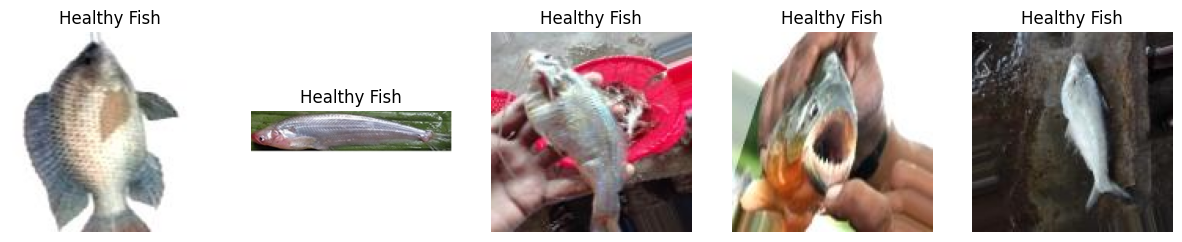

In [ ]:
import matplotlib.pyplot as plt
import cv2
import random

dataset_path = "/content/augmented_dataset"

# Select a random class
random_class = random.choice(os.listdir(dataset_path))
class_path = os.path.join(dataset_path, random_class)

# Select a few random images
random_images = random.sample(os.listdir(class_path), min(5, len(os.listdir(class_path))))

# Display images
fig, axes = plt.subplots(1, len(random_images), figsize=(15, 5))
for i, img_name in enumerate(random_images):
    img = cv2.imread(os.path.join(class_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(random_class)
plt.show()


#Augmented data

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog, local_binary_pattern
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import joblib

# Define dataset path
dataset_path = "/content/augmented_dataset"

def extract_features(image):
    """ Extract HOG and LBP features from an image """
    hog_features, _ = hog(image, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
    lbp = local_binary_pattern(image, P=8, R=1, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=np.arange(0, 11), density=True)
    return np.hstack((hog_features, lbp_hist))

def load_dataset(dataset_path):
    disease_classes = os.listdir(dataset_path)
    class_to_label = {cls: idx for idx, cls in enumerate(disease_classes)}

    X, y = [], []

    for cls in disease_classes:
        class_path = os.path.join(dataset_path, cls)
        images = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        for img_path in tqdm(images, desc=f"Processing {cls}"):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            features = extract_features(img)
            X.append(features)
            y.append(class_to_label[cls])

    return np.array(X), np.array(y), disease_classes

# Load dataset
X, y, disease_classes = load_dataset(dataset_path)

# Normalize data using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=150)  # Increase to 150 for better representation
X_pca = pca.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy (Optimized): {accuracy * 100:.2f}%")
print("\nClassification Report (Optimized):\n", classification_report(y_test, y_pred, target_names=disease_classes))

# Save the optimized model
joblib.dump(best_svm, "svm_fish_disease_optimized.pkl")
print("✅ Optimized Model saved as 'svm_fish_disease_optimized.pkl'")

Processing EUS: 100%|██████████| 155/155 [00:01<00:00, 78.41it/s]


Fitting 3 folds for each of 48 candidates, totalling 144 fits
SVM Model Accuracy (Optimized): 75.86%

Classification Report (Optimized):
                              precision    recall  f1-score   support

               Healthy Fish       0.60      0.65      0.62        37
           Tail And Fin Rot       0.95      0.95      0.95        37
     THE BACTERIAL GILL ROT       1.00      1.00      1.00        37
Broken antennae and rostrum       0.95      0.95      0.95        38
                    Argulus       0.69      0.54      0.61        37
                    Redspot       0.52      0.62      0.57        37
                        EUS       0.64      0.61      0.62        38

                   accuracy                           0.76       261
                  macro avg       0.76      0.76      0.76       261
               weighted avg       0.76      0.76      0.76       261

✅ Optimized Model saved as 'svm_fish_disease_optimized.pkl'


#non augmented

In [ ]:
import shutil
import os

src_folder = "/content/non_augmented_dataset/Fresh Water Fish Dataset"
dst_folder = "/content/non_augmented_dataset"

for cls in os.listdir(src_folder):
    src_class_path = os.path.join(src_folder, cls)
    dst_class_path = os.path.join(dst_folder, cls)

    if os.path.isdir(src_class_path):
        shutil.move(src_class_path, dst_class_path)  # Move folders to the correct location

# Remove the empty folder
os.rmdir(src_folder)
print("✅ Dataset structure fixed!")


✅ Dataset structure fixed!


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import joblib

# Define dataset path (Non-Augmented Data)
dataset_path = "/content/non_augmented_dataset"

def load_dataset(dataset_path):
    if not os.path.exists(dataset_path):
        raise ValueError(f"❌ Dataset path '{dataset_path}' not found!")

    disease_classes = os.listdir(dataset_path)
    class_to_label = {cls: idx for idx, cls in enumerate(disease_classes)}

    X, y = [], []

    for cls in disease_classes:
        class_path = os.path.join(dataset_path, cls)
        images = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        if len(images) == 0:
            print(f"⚠️ Warning: No images found in '{cls}' folder!")

        for img_path in tqdm(images[:5], desc=f"Checking {cls}"):  # Debugging: Print first 5 images
            print(f"Loading: {img_path}")

        for img_path in images:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"❌ Failed to load: {img_path}")
                continue
            img = cv2.resize(img, (128, 128))
            img = cv2.equalizeHist(img)

            X.append(img.flatten())
            y.append(class_to_label[cls])

    print(f"✅ Total images loaded: {len(X)}")
    return np.array(X), np.array(y), disease_classes

# Load Non-Augmented Dataset
X, y, disease_classes = load_dataset(dataset_path)

# Handle class imbalance using SMOTE (only if enough samples)
if len(set(y)) > 1 and len(X) > 1:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    print("⚠️ Not enough samples for SMOTE. Skipping oversampling.")
    X_resampled, y_resampled = X, y

# Normalize data
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train SVM model with RBF Kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

# Evaluate Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy (Non-Augmented): {accuracy * 100:.2f}%")
print("\nClassification Report (Non-Augmented):\n", classification_report(y_test, y_pred, target_names=disease_classes))

# Save the model
joblib.dump(svm_model, "svm_fish_disease_non_augmented.pkl")
print("✅ Non-Augmented Model saved as 'svm_fish_disease_non_augmented.pkl'")


Checking Argulus: 100%|██████████| 5/5 [00:00<00:00, 13357.66it/s]


Loading: /content/non_augmented_dataset/Argulus/argulus (9).jpg
Loading: /content/non_augmented_dataset/Argulus/24.jpg
Loading: /content/non_augmented_dataset/Argulus/argulus (8).jpg
Loading: /content/non_augmented_dataset/Argulus/32.jpg
Loading: /content/non_augmented_dataset/Argulus/18.jpg


Checking Broken antennae and rostrum: 100%|██████████| 5/5 [00:00<00:00, 14373.90it/s]


Loading: /content/non_augmented_dataset/Broken antennae and rostrum/Broken antennae and rostrum  (6).jpg
Loading: /content/non_augmented_dataset/Broken antennae and rostrum/Broken antennae and rostrum  (4).jpg
Loading: /content/non_augmented_dataset/Broken antennae and rostrum/Broken antennae and rostrum  (2).jpg
Loading: /content/non_augmented_dataset/Broken antennae and rostrum/Broken antennae and rostrum  (5).jpg
Loading: /content/non_augmented_dataset/Broken antennae and rostrum/Broken antennae and rostrum  (1).jpg


Checking Redspot: 100%|██████████| 5/5 [00:00<00:00, 8084.63it/s]


Loading: /content/non_augmented_dataset/Redspot/sarputi(Olive barb).jpg
Loading: /content/non_augmented_dataset/Redspot/EUS  (10).jpg
Loading: /content/non_augmented_dataset/Redspot/koi.jpg
Loading: /content/non_augmented_dataset/Redspot/Red Spot (2) - Copy.png
Loading: /content/non_augmented_dataset/Redspot/Red Spot (10).jpg


Checking THE BACTERIAL GILL ROT: 100%|██████████| 5/5 [00:00<00:00, 7286.84it/s]


Loading: /content/non_augmented_dataset/THE BACTERIAL GILL ROT/download (2).jpg
Loading: /content/non_augmented_dataset/THE BACTERIAL GILL ROT/download (8).jpg
Loading: /content/non_augmented_dataset/THE BACTERIAL GILL ROT/8088d0cc7e5bdb7cc9641ce262e8029e.jpg
Loading: /content/non_augmented_dataset/THE BACTERIAL GILL ROT/download (1).jpg
Loading: /content/non_augmented_dataset/THE BACTERIAL GILL ROT/download.jpg


Checking Tail And Fin Rot: 100%|██████████| 5/5 [00:00<00:00, 13074.51it/s]


Loading: /content/non_augmented_dataset/Tail And Fin Rot/download (2).jpg
Loading: /content/non_augmented_dataset/Tail And Fin Rot/download (4).jpg
Loading: /content/non_augmented_dataset/Tail And Fin Rot/download (5).jpg
Loading: /content/non_augmented_dataset/Tail And Fin Rot/download (6).jpg
Loading: /content/non_augmented_dataset/Tail And Fin Rot/download (1).jpg


Checking Healthy Fish: 100%|██████████| 5/5 [00:00<00:00, 11503.85it/s]


Loading: /content/non_augmented_dataset/Healthy Fish/healthy (18).jpg
Loading: /content/non_augmented_dataset/Healthy Fish/healthy (5).jpg
Loading: /content/non_augmented_dataset/Healthy Fish/healthy (21).jpg
Loading: /content/non_augmented_dataset/Healthy Fish/healthy (12).jpg
Loading: /content/non_augmented_dataset/Healthy Fish/healthy (26).jpg


Checking EUS: 100%|██████████| 5/5 [00:00<00:00, 29167.62it/s]


Loading: /content/non_augmented_dataset/EUS/EUS  (8).jpg
Loading: /content/non_augmented_dataset/EUS/EUS  (10).jpg
Loading: /content/non_augmented_dataset/EUS/12.jpg
Loading: /content/non_augmented_dataset/EUS/26.jpg
Loading: /content/non_augmented_dataset/EUS/EUS  (4).jpg
✅ Total images loaded: 133
SVM Model Accuracy (Non-Augmented): 40.91%

Classification Report (Non-Augmented):
                              precision    recall  f1-score   support

                    Argulus       0.25      0.17      0.20         6
Broken antennae and rostrum       0.83      0.83      0.83         6
                    Redspot       0.25      0.33      0.29         6
     THE BACTERIAL GILL ROT       1.00      0.71      0.83         7
           Tail And Fin Rot       0.57      0.67      0.62         6
               Healthy Fish       0.12      0.17      0.14         6
                        EUS       0.00      0.00      0.00         7

                   accuracy                           0.41   

#my implementation for improvement

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
# Path to your dataset
dataset_path = "/content/augmented_dataset"

# Load MobileNetV2 model
mobilenet = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))


In [ ]:
def load_and_extract_features(dataset_path):
    X, y = [], []
    class_names = sorted(os.listdir(dataset_path))
    class_to_idx = {cls: idx for idx, cls in enumerate(class_names)}

    for cls in class_names:
        cls_path = os.path.join(dataset_path, cls)
        for fname in tqdm(os.listdir(cls_path), desc=f"Processing {cls}"):
            if fname.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(cls_path, fname)
                img = load_img(img_path, target_size=(224, 224))
                img = img_to_array(img)
                img = preprocess_input(img)
                X.append(img)
                y.append(class_to_idx[cls])

    X = np.array(X)
    y = np.array(y)

    # Extract features using MobileNet
    features = mobilenet.predict(X, batch_size=32, verbose=1)
    return features, y, class_names

# Load data and extract features
X_features, y_labels, class_names = load_and_extract_features(dataset_path)


Processing Tail And Fin Rot: 100%|██████████| 54/54 [00:00<00:00, 778.65it/s]


25/25 [==============================] - 31s 1s/step


In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Handle imbalance
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y_labels)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


In [ ]:
# Define parameter grid for SVM
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf'],
    'decision_function_shape': ['ovo', 'ovr']
}

# Apply GridSearchCV
print("🔍 Performing GridSearchCV on SVM...")
grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

🔍 Performing GridSearchCV on SVM...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 0.01, 0.001], 'kernel': ['rbf']},
             verbose=1)

In [ ]:
# Best model
best_svm = grid.best_estimator_
print(f"\n✅ Best Hyperparameters: {grid.best_params_}")

# Evaluation
y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final CNN+SVM Accuracy (Optimized): {acc*100:.2f}%\n")
print("🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))



✅ Best Hyperparameters: {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.001, 'kernel': 'rbf'}

🎯 Final CNN+SVM Accuracy (Optimized): 82.76%

🧾 Classification Report:
                              precision    recall  f1-score   support

                    Argulus       0.70      0.81      0.75        37
Broken antennae and rostrum       0.93      1.00      0.96        37
                        EUS       0.65      0.65      0.65        37
               Healthy Fish       0.94      0.89      0.92        38
                    Redspot       0.56      0.49      0.52        37
     THE BACTERIAL GILL ROT       1.00      0.97      0.99        37
           Tail And Fin Rot       1.00      0.97      0.99        38

                   accuracy                           0.83       261
                  macro avg       0.83      0.83      0.82       261
               weighted avg       0.83      0.83      0.83       261



#Updated CNN+SVM Pipeline Using EfficientNet + PCA + Augmentation

In [ ]:
import os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Path to your dataset
dataset_path = "/content/augmented_dataset"

# Load EfficientNet model
feature_extractor = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

def load_and_extract_features_with_augmentation(dataset_path):
    X, y = [], []
    class_names = sorted(os.listdir(dataset_path))
    class_to_idx = {cls: idx for idx, cls in enumerate(class_names)}

    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.1,
        horizontal_flip=True,
        preprocessing_function=preprocess_input
    )

    for cls in class_names:
        cls_path = os.path.join(dataset_path, cls)
        for fname in tqdm(os.listdir(cls_path), desc=f"Processing {cls}"):
            if fname.endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(cls_path, fname)
                img = load_img(img_path, target_size=(224, 224))
                img = img_to_array(img)
                img = np.expand_dims(img, axis=0)
                aug_iter = datagen.flow(img, batch_size=1)
                aug_img = next(aug_iter)[0]  # Take 1 augmented version
                X.append(aug_img)
                y.append(class_to_idx[cls])

    X = np.array(X)
    y = np.array(y)

    features = feature_extractor.predict(X, batch_size=32, verbose=1)
    return features, y, class_names

# Step 1: Extract deep features
X_features, y_labels, class_names = load_and_extract_features_with_augmentation(dataset_path)

# Step 2: Normalize and PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=150)  # Reduce to 150 principal components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Handle imbalance with SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_pca, y_labels)

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 5: SVM GridSearchCV (finer grid)
param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.001, 0.005, 0.01],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

print("🔍 GridSearchCV tuning...")
grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)



16705208/16705208 [==============================] - 0s 0us/step


Processing Tail And Fin Rot: 100%|██████████| 54/54 [00:00<00:00, 96.93it/s]


25/25 [==============================] - 55s 2s/step
🔍 GridSearchCV tuning...
Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'class_weight': ['balanced'],
                         'gamma': [0.001, 0.005, 0.01], 'kernel': ['rbf']},
             verbose=1)

In [ ]:
best_svm = grid.best_estimator_
print(f"\n✅ Best Parameters: {grid.best_params_}")

# Step 6: Evaluation
y_pred = best_svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Accuracy with EfficientNet + Aug + PCA + SVM: {acc * 100:.2f}%")
print("🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))


✅ Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

🎯 Final Accuracy with EfficientNet + Aug + PCA + SVM: 85.82%
🧾 Classification Report:
                              precision    recall  f1-score   support

                    Argulus       0.76      0.84      0.79        37
Broken antennae and rostrum       0.95      1.00      0.97        37
                        EUS       0.67      0.84      0.75        37
               Healthy Fish       0.94      0.89      0.92        38
                    Redspot       0.67      0.43      0.52        37
     THE BACTERIAL GILL ROT       1.00      1.00      1.00        37
           Tail And Fin Rot       1.00      1.00      1.00        38

                   accuracy                           0.86       261
                  macro avg       0.86      0.86      0.85       261
               weighted avg       0.86      0.86      0.85       261



#using both

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import joblib
from tqdm import tqdm

# Paths
dataset_path = "/content/augmented_dataset"

# Image settings
IMG_SIZE = 224
BATCH_SIZE = 32

# Load CNN model for feature extraction
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Load and preprocess images
def load_and_extract_features(path):
    X, y, labels = [], [], []
    class_names = os.listdir(path)
    class_to_label = {cls: idx for idx, cls in enumerate(class_names)}

    for cls in class_names:
        cls_path = os.path.join(path, cls)
        images = [os.path.join(cls_path, f) for f in os.listdir(cls_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        for img_path in tqdm(images, desc=f"Processing {cls}"):
            img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
            img_array = img_to_array(img)
            img_array = preprocess_input(img_array)
            X.append(img_array)
            y.append(class_to_label[cls])
            labels.append(cls)

    X = np.array(X)
    y = np.array(y)
    return X, y, class_names

# Feature extraction
def extract_features(X):
    features = base_model.predict(X, batch_size=BATCH_SIZE, verbose=1)
    return features

# Load data
X_images, y, class_names = load_and_extract_features(dataset_path)

# Extract features using MobileNetV2
X_features = extract_features(X_images)

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_features)

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# SVM with GridSearchCV
param_grid = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

svm = SVC(probability=True)
grid = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

# Evaluation
y_pred = grid.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Save model
joblib.dump(grid.best_estimator_, "cnn_svm_mobilenet_model.pkl")
print("\n🎉 Model saved as 'cnn_svm_mobilenet_model.pkl'")


Processing EUS: 100%|██████████| 155/155 [00:00<00:00, 491.83it/s]


25/25 [==============================] - 24s 943ms/step
Fitting 3 folds for each of 9 candidates, totalling 27 fits

✅ Final Accuracy: 86.59%

Classification Report:

                             precision    recall  f1-score   support

               Healthy Fish       0.89      0.84      0.86        37
           Tail And Fin Rot       1.00      1.00      1.00        37
     THE BACTERIAL GILL ROT       1.00      1.00      1.00        37
Broken antennae and rostrum       0.90      0.97      0.94        38
                    Argulus       0.77      0.73      0.75        37
                    Redspot       0.71      0.78      0.74        37
                        EUS       0.80      0.74      0.77        38

                   accuracy                           0.87       261
                  macro avg       0.87      0.87      0.87       261
               weighted avg       0.87      0.87      0.87       261


🎉 Model saved as 'cnn_svm_mobilenet_model.pkl'


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess

# --- STEP 1: Load and Preprocess Data ---
def augment_image(img):
    # Gaussian blur + noise for generalization
    img = cv2.GaussianBlur(img, (3, 3), 0)
    noise = np.random.normal(0, 10, img.shape).astype(np.uint8)
    return cv2.add(img, noise)

def load_data(data_dir, img_size=(224, 224)):
    X, y = [], []
    class_names = sorted(os.listdir(data_dir))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

    for cls in class_names:
        cls_folder = os.path.join(data_dir, cls)
        if not os.path.isdir(cls_folder): continue
        print(f"Processing {cls}: ", end='')
        images = os.listdir(cls_folder)
        for img_name in tqdm(images):
            img_path = os.path.join(cls_folder, img_name)
            img = cv2.imread(img_path)
            if img is None: continue
            img = cv2.resize(img, img_size)
            img = augment_image(img)
            X.append(img)
            y.append(class_to_idx[cls])
    return np.array(X), np.array(y), class_names

# Update the data directory to the augmented dataset path
data_dir = "/content/augmented_dataset"  # Change if needed
X, y, class_names = load_data(data_dir)
print(f"Total samples: {len(X)}")

# --- STEP 2: Feature Extraction with MobileNetV2 + EfficientNetB0 ---
def extract_features_stacked(X):
    mobilenet = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
    efficientnet = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

    X_mob = mobilenet.predict(mobilenet_preprocess(X.copy()), verbose=1, batch_size=32)
    X_eff = efficientnet.predict(efficientnet_preprocess(X.copy()), verbose=1, batch_size=32)
    return np.hstack([X_mob, X_eff])

features = extract_features_stacked(X)
print("Feature shape:", features.shape)

# --- STEP 3: Preprocessing and PCA ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

pca = PCA(n_components=300, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA shape:", X_pca.shape)

# --- STEP 4: SMOTE for Balancing ---
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_pca, y)
print(f"After SMOTE: {X_balanced.shape}, {np.bincount(y_balanced)}")

# --- STEP 5: Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# --- STEP 6: SVM + GridSearch ---
param_grid = {
    'C': [10, 100, 1000],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

joblib.dump(best_model, "fish_disease_stacked_svm.pkl")

Processing Argulus: 

100%|██████████| 136/136 [00:01<00:00, 115.50it/s]


Processing Broken antennae and rostrum: 

100%|██████████| 42/42 [00:00<00:00, 122.33it/s]


Processing EUS: 

100%|██████████| 155/155 [00:01<00:00, 112.07it/s]


Processing Healthy Fish: 

100%|██████████| 186/186 [00:00<00:00, 186.60it/s]


Processing Redspot: 

100%|██████████| 185/185 [00:00<00:00, 196.66it/s]


Processing THE BACTERIAL GILL ROT: 

100%|██████████| 36/36 [00:00<00:00, 191.33it/s]


Processing Tail And Fin Rot: 

100%|██████████| 54/54 [00:00<00:00, 204.29it/s]


Total samples: 794
25/25 [==============================] - 48s 2s/step
Feature shape: (794, 2560)
PCA shape: (794, 300)
After SMOTE: (1302, 300), [186 186 186 186 186 186 186]
Fitting 5 folds for each of 9 candidates, totalling 45 fits

🎯 Final Accuracy: 88.51%

Classification Report:
                             precision    recall  f1-score   support

                    Argulus       0.75      0.89      0.81        37
Broken antennae and rostrum       0.97      0.97      0.97        37
                        EUS       0.76      0.84      0.79        37
               Healthy Fish       0.94      0.87      0.90        38
                    Redspot       0.79      0.62      0.70        37
     THE BACTERIAL GILL ROT       1.00      1.00      1.00        37
           Tail And Fin Rot       1.00      1.00      1.00        38

                   accuracy                           0.89       261
                  macro avg       0.89      0.88      0.88       261
               weight

['fish_disease_stacked_svm.pkl']

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import joblib
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mob
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_eff
from tensorflow.keras.preprocessing.image import img_to_array
# Paths
DATA_DIR = "/content/augmented_dataset"  # Update to correct folder name
IMAGE_SIZE = 224

# Load data
def load_images(data_dir, image_size):
    data, labels = [], []
    class_names = sorted(os.listdir(data_dir))
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path): continue
        print(f"Processing {class_name}:")
        for file in tqdm(os.listdir(class_path)):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is None: continue
            img = cv2.resize(img, (image_size, image_size))
            data.append(img)
            labels.append(class_name)
    return np.array(data), np.array(labels), class_names

X, y, class_names = load_images(DATA_DIR, IMAGE_SIZE)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.33, random_state=42)

# Feature Extractors
def get_feature_model(base_model):
    return tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-2].output)

mob_model = get_feature_model(MobileNetV2(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3)))
eff_model = get_feature_model(EfficientNetB0(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3)))

# Extract features
def extract_features(model, data, preprocess):
    data_pp = preprocess(data.astype("float32"))
    return model.predict(data_pp, verbose=1)

X_mob_train = extract_features(mob_model, X_train, preprocess_mob)
X_eff_train = extract_features(eff_model, X_train, preprocess_eff)
X_mob_test  = extract_features(mob_model, X_test, preprocess_mob)
X_eff_test  = extract_features(eff_model, X_test, preprocess_eff)

# Concatenate features
X_train_feat = np.concatenate([X_mob_train, X_eff_train], axis=1)
X_test_feat = np.concatenate([X_mob_test, X_eff_test], axis=1)
print("Feature shape:", X_train_feat.shape)

# PCA
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train_feat)
X_test_pca = pca.transform(X_test_feat)
print("PCA shape:", X_train_pca.shape)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)
print("After SMOTE:", X_resampled.shape, np.bincount(y_resampled))

# 🧠 Ensemble of SVMs
svm1 = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
svm2 = SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
svm3 = SVC(kernel='rbf', C=100, gamma=0.0001, probability=True)

ensemble = VotingClassifier(estimators=[
    ('svm1', svm1),
    ('svm2', svm2),
    ('svm3', svm3)
], voting='soft')

# Train
ensemble.fit(X_resampled, y_resampled)

# Evaluate
y_pred = ensemble.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Ensemble Accuracy: {acc*100:.2f}%\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# Save model
joblib.dump(ensemble, 'fish_disease_ensemble_svm.pkl')
print("✅ Model saved as 'fish_disease_ensemble_svm.pkl'")


Processing Argulus:


100%|██████████| 136/136 [00:00<00:00, 1119.53it/s]


Processing Broken antennae and rostrum:


100%|██████████| 42/42 [00:00<00:00, 2094.88it/s]


Processing EUS:


100%|██████████| 155/155 [00:00<00:00, 1817.77it/s]


Processing Healthy Fish:


100%|██████████| 186/186 [00:00<00:00, 1460.17it/s]


Processing Redspot:


100%|██████████| 185/185 [00:00<00:00, 1043.86it/s]


Processing THE BACTERIAL GILL ROT:


100%|██████████| 36/36 [00:00<00:00, 752.94it/s]


Processing Tail And Fin Rot:


100%|██████████| 54/54 [00:00<00:00, 1386.31it/s]


9/9 [==============================] - 15s 2s/step
Feature shape: (531, 14, 7, 1280)


ValueError: Found array with dim 4. PCA expected <= 2.

In [ ]:
import os
import numpy as np
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import joblib
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_mob
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_eff

# Paths
DATA_DIR = "/content/augmented_dataset"
IMAGE_SIZE = 224

# Load data
def load_images(data_dir, image_size):
    data, labels = [], []
    class_names = sorted(os.listdir(data_dir))
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path): continue
        print(f"Processing {class_name}:")
        for file in tqdm(os.listdir(class_path)):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)
            if img is None: continue
            img = cv2.resize(img, (image_size, image_size))
            data.append(img)
            labels.append(class_name)
    return np.array(data), np.array(labels), class_names

X, y, class_names = load_images(DATA_DIR, IMAGE_SIZE)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, stratify=y_encoded, test_size=0.33, random_state=42)

# CNN models with avg pooling for 2D feature output
mob_model = MobileNetV2(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3))
eff_model = EfficientNetB0(weights="imagenet", include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Feature extraction function
def extract_features(model, data, preprocess):
    data_pp = preprocess(data.astype("float32"))
    return model.predict(data_pp, verbose=1)

# Extract features
X_mob_train = extract_features(mob_model, X_train, preprocess_mob)
X_eff_train = extract_features(eff_model, X_train, preprocess_eff)
X_mob_test  = extract_features(mob_model, X_test, preprocess_mob)
X_eff_test  = extract_features(eff_model, X_test, preprocess_eff)

# Concatenate features
X_train_feat = np.concatenate([X_mob_train, X_eff_train], axis=1)
X_test_feat  = np.concatenate([X_mob_test, X_eff_test], axis=1)
print("✅ Feature shape after concat:", X_train_feat.shape)

# PCA
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train_feat)
X_test_pca = pca.transform(X_test_feat)
print("✅ PCA shape:", X_train_pca.shape)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_pca, y_train)
print("✅ After SMOTE:", X_resampled.shape, np.bincount(y_resampled))

# SVM Ensemble
svm1 = SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
svm2 = SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
svm3 = SVC(kernel='rbf', C=100, gamma=0.0001, probability=True)

ensemble = VotingClassifier(estimators=[
    ('svm1', svm1),
    ('svm2', svm2),
    ('svm3', svm3)
], voting='soft')

# Train
ensemble.fit(X_resampled, y_resampled)

# Evaluate
y_pred = ensemble.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Final Ensemble Accuracy: {acc*100:.2f}%")
print(classification_report(y_test, y_pred, target_names=class_names))

# Save model
joblib.dump(ensemble, 'fish_disease_ensemble_svm.pkl')
print("✅ Model saved as 'fish_disease_ensemble_svm.pkl'")


Processing Argulus:


100%|██████████| 136/136 [00:00<00:00, 1299.29it/s]


Processing Broken antennae and rostrum:


100%|██████████| 42/42 [00:00<00:00, 1609.45it/s]


Processing EUS:


100%|██████████| 155/155 [00:00<00:00, 675.93it/s]


Processing Healthy Fish:


100%|██████████| 186/186 [00:00<00:00, 759.60it/s]


Processing Redspot:


100%|██████████| 185/185 [00:00<00:00, 988.65it/s]


Processing THE BACTERIAL GILL ROT:


100%|██████████| 36/36 [00:00<00:00, 484.79it/s]


Processing Tail And Fin Rot:


100%|██████████| 54/54 [00:00<00:00, 1362.52it/s]


9/9 [==============================] - 16s 2s/step
✅ Feature shape after concat: (531, 2560)
✅ PCA shape: (531, 300)
✅ After SMOTE: (868, 300) [124 124 124 124 124 124 124]

🎯 Final Ensemble Accuracy: 71.48%
                             precision    recall  f1-score   support

                    Argulus       0.65      0.62      0.64        45
Broken antennae and rostrum       0.43      0.21      0.29        14
                        EUS       0.57      0.63      0.60        51
               Healthy Fish       0.84      0.94      0.89        62
                    Redspot       0.64      0.62      0.63        61
     THE BACTERIAL GILL ROT       1.00      0.92      0.96        12
           Tail And Fin Rot       1.00      1.00      1.00        18

                   accuracy                           0.71       263
                  macro avg       0.73      0.71      0.71       263
               weighted avg       0.71      0.71      0.71       263

✅ Model saved as 'fish_disease